In [1]:
import torch
import numpy as np
import os
import sys
sys.path.append('../')
from ood_gan import *
from models.dc_gan_model import *
from dataset import *
from config import *
from models.model import *
from eval import *
import argparse
import time
import yaml

[KeOps] Warning : Cuda libraries were not detected on the system ; using cpu only mode


In [124]:
sys.path.append('../')
fm_path = "../checkpoint/OOD-GAN/FashionMNIST/Balanced/64/[FashionMNIST]-[64]-[Balanced]-[0]_[23].pt"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
G = Generator(96, 1).to(device)
ckpt = torch.load(fm_path, map_location=device)
G.load_state_dict(torch.load(fm_path, map_location=device)['G-state'])

cpu


<All keys matched successfully>

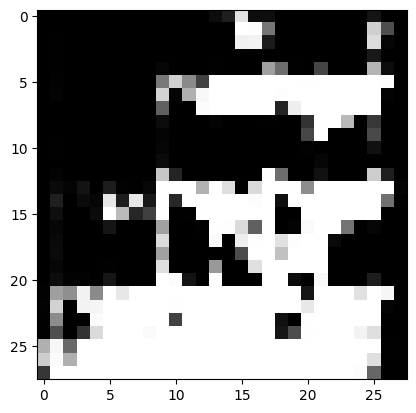

In [137]:
seeds = torch.randn(1, 96, 1, 1).to(device)
example_imgs = G(seeds)
example_imgs = example_imgs.cpu().detach().numpy()

plt.imshow(np.transpose(example_imgs[0], (1, 2, 0)), cmap='gray')


(6, 1, 28, 28)


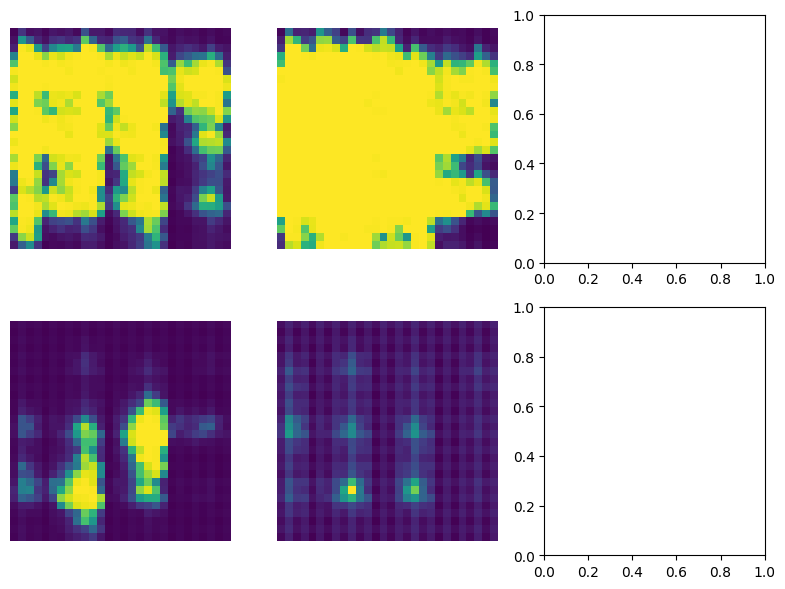

In [76]:
# Generate seeds and run generator
seeds = torch.randn(6, 96, 1, 1).to(device)
example_imgs = G(seeds)  # Output shape should be [9, C, H, W]

# Move to CPU and convert to numpy
example_imgs = example_imgs.cpu().detach().numpy()

# Optional: Normalize images to [0, 1]
# example_imgs = (example_imgs - example_imgs.min()) / (example_imgs.max() - example_imgs.min())
print(example_imgs.shape)  # Should be [9, C, H, W]
# Plotting
fig, axs = plt.subplots(2, 3, figsize=(8, 6))

for i in range(6):
    img = example_imgs[i]  # Shape: [C, H, W]
    img = np.transpose(img, (1, 2, 0))  # Convert to [H, W, C]

    ax = axs[i // 3, i % 2]
    if img.shape[2] == 1:  # If grayscale
        # ax.imshow(img.squeeze(), cmap='gray')
        ax.imshow(img.squeeze())
    else:
        ax.imshow(img)
    ax.axis('off')

plt.tight_layout()
plt.show()

# 3DPC

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
G = PCGenerator().to(device)
path = "..\\checkpoint\\OOD-GAN\\3DPC\\Imbalanced\\50\\[3DPC]-[50]-[Imbalanced]-[0]_[3].pt"
ckpt = torch.load(path, map_location=device)
G.load_state_dict(torch.load(path, map_location=device)['G-state'])

cpu


FileNotFoundError: [Errno 2] No such file or directory: '..\\checkpoint\\OOD-GAN\\3DPC\\Imbalanced\\50\\[3DPC]-[50]-[Imbalanced]-[0]_[3].pt'

In [ ]:
z = torch.normal(0, 1, (1, 32)).to(device)
img = G(z).detach().squeeze().cpu().numpy()
print(img.shape)

(300, 3)


In [45]:
# visualize 3D point cloud
import open3d as o3d
import matplotlib.pyplot as plt
# Visualize the point cloud using Open3D
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(img)
# pcd.colors = o3d.utility.Vector3dVector(np.random.rand(img.shape[0], 3))  # Optional: Add random colors to the points

o3d.visualization.draw_geometries([pcd])


In [41]:
path = "../checkpoint/OOD-Sample/3DPC/OOD-Imbalanced-1000.pt"
data = torch.load(path)
data = data[0]
print(data.shape)

eg = data[0].unsqueeze(0).squeeze().cpu().numpy()
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(eg)
# pcd.colors = o3d.utility.Vector3dVector(np.random.rand(img.shape[0], 3))  # Optional: Add random colors to the points

o3d.visualization.draw_geometries([pcd])


torch.Size([1000, 1, 300, 3])
